In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from random import random
from scipy.special import comb
import scipy as sp

sns.set(style='ticks', color_codes = True)


import warnings
warnings.filterwarnings(action='ignore')

In [2]:
x_min = 0.0
x_max = 16

mean = 8.0
std = 3.0

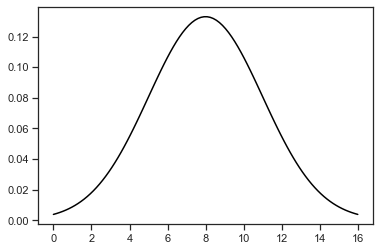

In [3]:
x = np.linspace(x_min, x_max, 100) # 100등분
y = sp.stats.norm.pdf(x, mean, std) # prob density func
plt.plot(x, y, color = 'black')

In [4]:
def normal_dist_func(x):
    return sp.stats.norm.pdf(x, mean, std)

In [5]:
x1 = mean + std
x2 = mean + 2.0 * std

In [10]:
from scipy.integrate import quad

In [12]:
res, err = quad(normal_dist_func, x1, x2)
res, err

(0.13590512198327787, 1.508849955903256e-15)

In [13]:
ptx = np.linspace(x1, x2, 10)
pty = sp.stats.norm.pdf(ptx, mean, std)

Normal Distribution (mean, std) : (8.0, 3.0)
Integration between 11.0 and 14.0 --> 0.13590512198327787


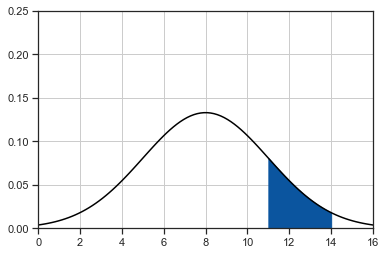

In [16]:
plt.xlim(x_min, x_max)
plt.ylim(0, 0.25)
plt.grid()

plt.fill_between(ptx, pty, color="#0b559f")
plt.plot(x, y, color = 'black')

print(f'Normal Distribution (mean, std) : {mean, std}')
print(f"Integration between {x1} and {x2} --> {res}")

In [18]:
import scipy

In [20]:
scipy.stats.norm.cdf(x2, loc=8, scale=3), scipy.stats.norm.cdf(x1, loc=8, scale=3)

(0.9772498680518208, 0.8413447460685429)

In [21]:
scipy.stats.norm.cdf(x2, loc=8, scale=3) - scipy.stats.norm.cdf(x1, loc=8, scale=3) 
# 14까지의 값 - 11까지의 값 > integration between 

0.13590512198327787

$$
X - \mu \over \sigma
$$

In [22]:
df = pd.read_csv(os.path.join('data', 'StudentsPerformance.csv'))
df.shape

(1000, 8)

In [23]:
z_math = (df['math score'] - df['math score'].mean()) / df['math score'].std()
z_math

0      0.389828
1      0.191979
2      1.576922
3     -1.258913
4      0.653627
         ...   
995    1.445023
996   -0.269668
997   -0.467517
998    0.126030
999    0.719577
Name: math score, Length: 1000, dtype: float64

<AxesSubplot:xlabel='math score', ylabel='Density'>

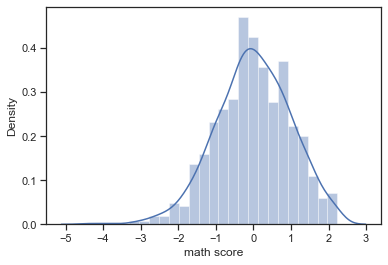

In [36]:
# 정규분포를 따른다.
sns.distplot(z_math)

In [37]:
# 80점 이상인 경우 > 17%
sum(df['math score'] > 80) / df.shape[0]

0.176

In [30]:
# 80 점까지의 cdf값
1 - sp.stats.norm.cdf(80, loc=df['math score'].mean(), scale=df['math score'].std())

0.17945979447713933

In [31]:
z_80 = (80 - df['math score'].mean()) / df['math score'].std()
z_80

0.9174257414666717

In [38]:
1 - sp.stats.norm.cdf(z_80)
# cdf는 표준정규분포를 기본적으로 가정

0.17945979447713933